In [89]:
# Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

In [325]:
listaData = []

for ano in range(2016, 2019+1):
    for mes in range(1,12+1):
        filename = ('Datasets/DadosBO_' + str(ano)+
                    '_' + str(mes) + '(FEMINICÍDIO).xls')
        try:
            datames = pd.read_csv(filename,sep='\t',encoding='utf-16-le')
            listaData.append(datames)
        except:
            print('erro ' + filename)

data = pd.concat(listaData, sort=True)


erro Datasets/DadosBO_2019_8(FEMINICÍDIO).xls
erro Datasets/DadosBO_2019_9(FEMINICÍDIO).xls
erro Datasets/DadosBO_2019_10(FEMINICÍDIO).xls
erro Datasets/DadosBO_2019_11(FEMINICÍDIO).xls
erro Datasets/DadosBO_2019_12(FEMINICÍDIO).xls


In [95]:
# Mostrando as 5 primeiras instâncias

data.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2018,141,141/2018,03/01/2018 17:22:43,03/01/2018 19:14:25,03/01/2018,A TARDE,03/01/2018,03/01/2018 17:22:43,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
1,2018,141,141/2018,03/01/2018 17:22:43,03/01/2018 19:14:25,03/01/2018,A TARDE,03/01/2018,03/01/2018 17:22:43,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
2,2018,141,141/2018,03/01/2018 17:22:43,03/01/2018 19:14:25,03/01/2018,A TARDE,03/01/2018,03/01/2018 17:22:43,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
3,2018,150,150/2018,07/01/2018 02:28:38,07/01/2018 05:29:57,07/01/2018,DE MADRUGADA,07/01/2018,07/01/2018 02:28:38,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
4,2018,150,150/2018,07/01/2018 02:28:38,07/01/2018 05:29:57,07/01/2018,DE MADRUGADA,07/01/2018,07/01/2018 02:28:38,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN


In [327]:
# Verificando a quantidade de instâncias por atributos

data.shape

(929, 56)

In [328]:
# Verificando dados nulos

data.isna().sum()

ANO_BO                        0
ANO_FABRICACAO                0
ANO_MODELO                    0
BAIRRO                       33
BO_AUTORIA                    0
BO_EMITIDO                    0
BO_INICIADO                   0
CIDADE                        5
CIDADE_VEICULO              911
CORCUTIS                    104
DATACOMUNICACAO               0
DATAELABORACAO                0
DATANASCIMENTO              121
DATAOCORRENCIA                0
DELEGACIA_CIRCUNSCRICAO       0
DELEGACIA_NOME                0
DESCRICAOLOCAL                0
DESCR_COR_VEICULO           911
DESCR_MARCA_VEICULO         911
DESCR_TIPO_VEICULO          911
DESDOBRAMENTO               258
ESPECIE                       0
ESTADOCIVIL                 163
EXAME                       110
FLAGRANTE                     0
GRAUINSTRUCAO               422
IDADE                       118
LATITUDE                    648
LOGRADOURO                  648
LONGITUDE                   648
MARCA_CELULAR               929
NACIONAL

In [329]:
# Removendo colunas que apresentaram muitos dados faltantes, sendo irrelevante sua utilização, podendo até atrapalhar
# em uma possível predição.

data.drop(['NUMERO_BOLETIM_PRINCIPAL', 'LOGRADOURO', 'LATITUDE', 'LONGITUDE', 'PARENTESCO', 'PLACA_VEICULO', 
              'UF_VEICULO', 'CIDADE_VEICULO', 'DESCR_COR_VEICULO', 'DESCR_MARCA_VEICULO', 'QUANT_CELULAR', 
              'MARCA_CELULAR', 'RELACIONAMENTO', 'GRAUINSTRUCAO', 'DESCR_TIPO_VEICULO'], axis=1, inplace=True)

In [330]:
# Verificando o tipo de cada atributo

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 15
Data columns (total 41 columns):
ANO_BO                     929 non-null int64
ANO_FABRICACAO             929 non-null int64
ANO_MODELO                 929 non-null int64
BAIRRO                     896 non-null object
BO_AUTORIA                 929 non-null object
BO_EMITIDO                 929 non-null object
BO_INICIADO                929 non-null object
CIDADE                     924 non-null object
CORCUTIS                   825 non-null object
DATACOMUNICACAO            929 non-null object
DATAELABORACAO             929 non-null object
DATANASCIMENTO             808 non-null object
DATAOCORRENCIA             929 non-null object
DELEGACIA_CIRCUNSCRICAO    929 non-null object
DELEGACIA_NOME             929 non-null object
DESCRICAOLOCAL             929 non-null object
DESDOBRAMENTO              671 non-null object
ESPECIE                    929 non-null object
ESTADOCIVIL                766 non-null object
EXAME 

In [331]:
# Separando dados numéricos de dados categóricos

numerics = ['ANO_BO', 'NUM_BO', 'NUMERO', 'RG', 'IDADE', 'ANO_FABRICACAO', 'ANO_MODELO']
categorics = ['NUMERO_BOLETIM', 'BO_INICIADO', 'BO_EMITIDO', 'DATAOCORRENCIA', 'PERIDOOCORRENCIA', 
              'DATACOMUNICACAO', 'DATAELABORACAO', 'BO_AUTORIA', 'FLAGRANTE', 'BAIRRO', 'CIDADE', 'UF', 
              'DESCRICAOLOCAL', 'EXAME', 'SOLUCAO', 'DELEGACIA_NOME', 'DELEGACIA_CIRCUNSCRICAO', 'ESPECIE', 
              'RUBRICA', 'DESDOBRAMENTO', 'STATUS', 'NOMEPESSOA', 'TIPOPESSOA', 'VITIMAFATAL', 'RG_UF', 
              'NATURALIDADE', 'NACIONALIDADE', 'SEXO', 'DATANASCIMENTO', 'ESTADOCIVIL', 'PROFISSAO', 
              'CORCUTIS', 'NATUREZAVINCULADA', 'TIPOVINCULO']

In [332]:
# Substituindo valores nulos pela média pra valores numéricos e pela moda para valores categóricos

imp_numerics = SimpleImputer(strategy='mean')
imp_categorics = SimpleImputer(strategy='most_frequent')

In [333]:
# Aplicando as transformações nos dados nulos

data[numerics] = imp_numerics.fit_transform(data[numerics])
data[categorics] = imp_categorics.fit_transform(data[categorics])

In [334]:
# Verificando se ainda restam dados nulos

data.isna().sum()

ANO_BO                     0
ANO_FABRICACAO             0
ANO_MODELO                 0
BAIRRO                     0
BO_AUTORIA                 0
BO_EMITIDO                 0
BO_INICIADO                0
CIDADE                     0
CORCUTIS                   0
DATACOMUNICACAO            0
DATAELABORACAO             0
DATANASCIMENTO             0
DATAOCORRENCIA             0
DELEGACIA_CIRCUNSCRICAO    0
DELEGACIA_NOME             0
DESCRICAOLOCAL             0
DESDOBRAMENTO              0
ESPECIE                    0
ESTADOCIVIL                0
EXAME                      0
FLAGRANTE                  0
IDADE                      0
NACIONALIDADE              0
NATURALIDADE               0
NATUREZAVINCULADA          0
NOMEPESSOA                 0
NUMERO                     0
NUMERO_BOLETIM             0
NUM_BO                     0
PERIDOOCORRENCIA           0
PROFISSAO                  0
RG                         0
RG_UF                      0
RUBRICA                    0
SEXO          

In [335]:
# Verificando se há dados faltantes

print(data.duplicated(['ANO_BO', 'NUM_BO', 'DELEGACIA_NOME']))

0     False
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
0     False
1     False
2      True
3     False
4     False
5      True
6      True
7     False
8      True
9      True
0     False
1     False
2      True
3      True
      ...  
4      True
5     False
6      True
7     False
8     False
9      True
10     True
11    False
12     True
13     True
14    False
15    False
16    False
17     True
0     False
1      True
2     False
3      True
4      True
5      True
6     False
7      True
8      True
9      True
10    False
11     True
12     True
13     True
14    False
15    False
Length: 929, dtype: bool


In [336]:
# Removendo dados duplicados

data.drop_duplicates(['ANO_BO', 'NUM_BO', 'DELEGACIA_NOME'], inplace=True)

In [337]:
data.shape

(390, 41)

In [338]:
data.columns

Index(['ANO_BO', 'ANO_FABRICACAO', 'ANO_MODELO', 'BAIRRO', 'BO_AUTORIA',
       'BO_EMITIDO', 'BO_INICIADO', 'CIDADE', 'CORCUTIS', 'DATACOMUNICACAO',
       'DATAELABORACAO', 'DATANASCIMENTO', 'DATAOCORRENCIA',
       'DELEGACIA_CIRCUNSCRICAO', 'DELEGACIA_NOME', 'DESCRICAOLOCAL',
       'DESDOBRAMENTO', 'ESPECIE', 'ESTADOCIVIL', 'EXAME', 'FLAGRANTE',
       'IDADE', 'NACIONALIDADE', 'NATURALIDADE', 'NATUREZAVINCULADA',
       'NOMEPESSOA', 'NUMERO', 'NUMERO_BOLETIM', 'NUM_BO', 'PERIDOOCORRENCIA',
       'PROFISSAO', 'RG', 'RG_UF', 'RUBRICA', 'SEXO', 'SOLUCAO', 'STATUS',
       'TIPOPESSOA', 'TIPOVINCULO', 'UF', 'VITIMAFATAL'],
      dtype='object')

### Dentre os períodos de um dia, podemos constatar que o período da noite é o que ocorre um maior número de casos.

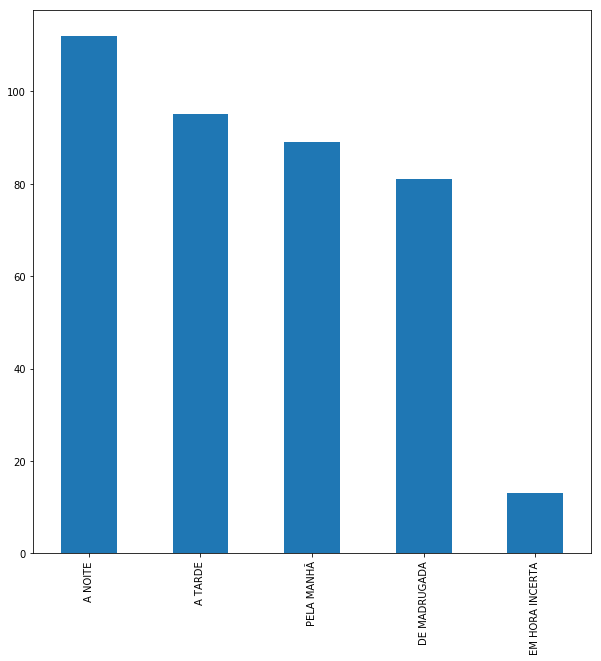

In [346]:
# Plotando um gráfico de barras do período de ocorrência

plt.figure(figsize=(10,10))
data['PERIDOOCORRENCIA'].value_counts().plot(kind='bar');

### Com bases na informações apresentadas, podemos perceber no gráfico que a cidade de São Paulo teve o maior número de BO's, seguido por Campinas e Guarulhos.

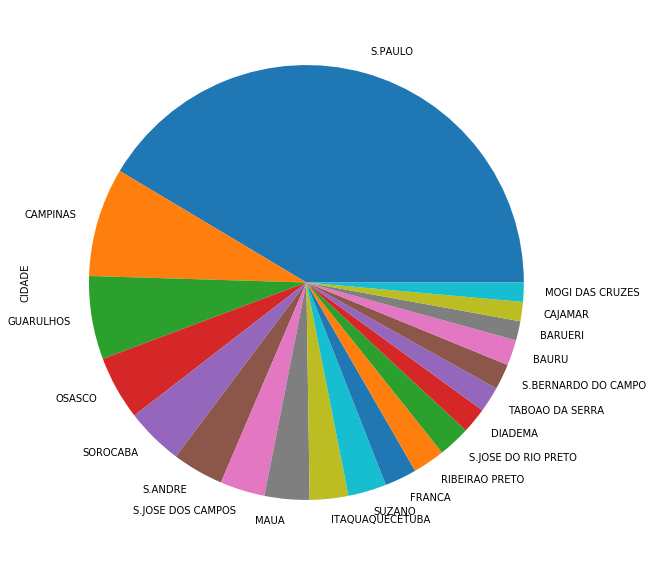

In [340]:
# Plotando um gráfico de pizza das cidades que mais houveram casos.

plt.figure(figsize=(10,10))
data['CIDADE'].value_counts()[0:20].plot(kind='pie');

In [341]:
# Convertendo os dados de data para o padrão do Pandas

data['DATAOCORRENCIA'] = pd.to_datetime(data['DATAOCORRENCIA'], format='%d/%m/%Y')

In [342]:
data['DATAOCORRENCIA'].head()

0   2016-01-19
0   2016-01-31
1   2016-02-07
3   2016-02-12
4   2016-02-15
Name: DATAOCORRENCIA, dtype: datetime64[ns]

In [343]:
# Função para contar os dias que mais houveram BO's por Feminicídio.

DiaDaSemana = ['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']
DS = lambda x: DiaDaSemana[x.dayofweek]
data['DIASEMANA'] = data['DATAOCORRENCIA'].apply(DS)

In [344]:
data['DIASEMANA'].head()

0      Terca
0    Domingo
1    Domingo
3      Sexta
4    Segunda
Name: DIASEMANA, dtype: object

### Gráfico da distribuição de dados com relação ao dia da semana em que mais houve BO's por feminicídio. Como podemos ver, os dias em que tivemos mais casos nos últimos 18 meses foram Sábado e Domingo.

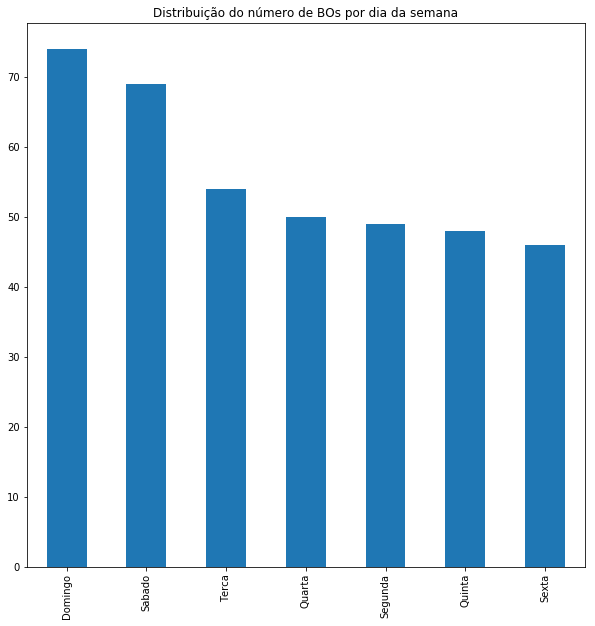

In [345]:
plt.figure(figsize=(10,10))
data['DIASEMANA'].value_counts().plot(kind='bar')
plt.title('Distribuição do número de BOs por dia da semana');

In [347]:
data['MESANO'] = data['DATAOCORRENCIA'].dt.month

### Como podemos ver, o mês de Maio apresentar um maior número de BOs

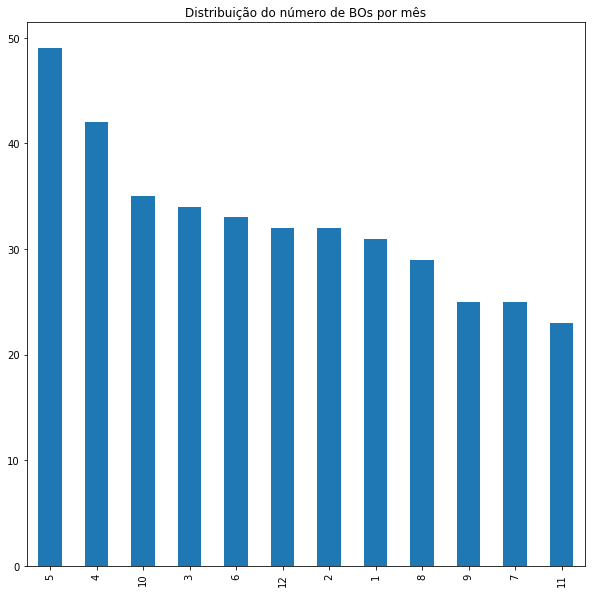

In [348]:
plt.figure(figsize=(10,10))
data['MESANO'].value_counts().plot(kind='bar')
plt.title('Distribuição do número de BOs por mês');

In [360]:
data_19 = data[data['ANO_BO'] == 2019]
data_18 = data[data['ANO_BO'] == 2018]
data_17 = data[data['ANO_BO'] == 2017]
data_16 = data[data['ANO_BO'] == 2016]

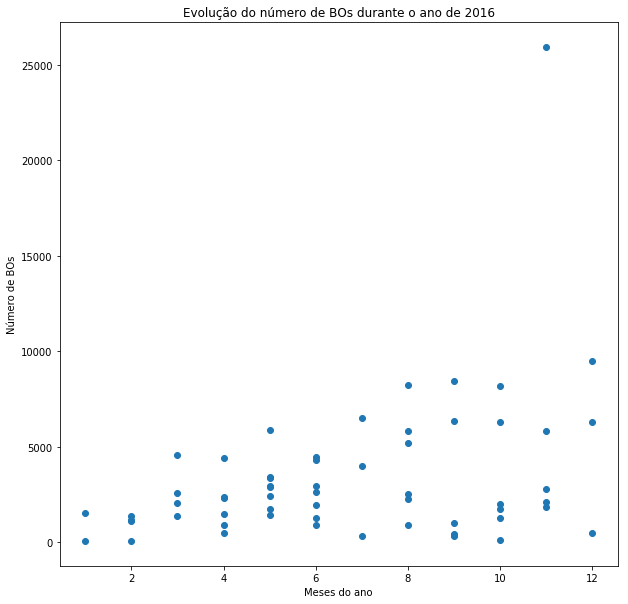

In [361]:
plt.figure(figsize=(10,10))
plt.scatter(data_16['MESANO'], data_16['NUM_BO'])
plt.xlabel('Meses do ano')
plt.ylabel('Número de BOs')
plt.title('Evolução do número de BOs durante o ano de 2016');

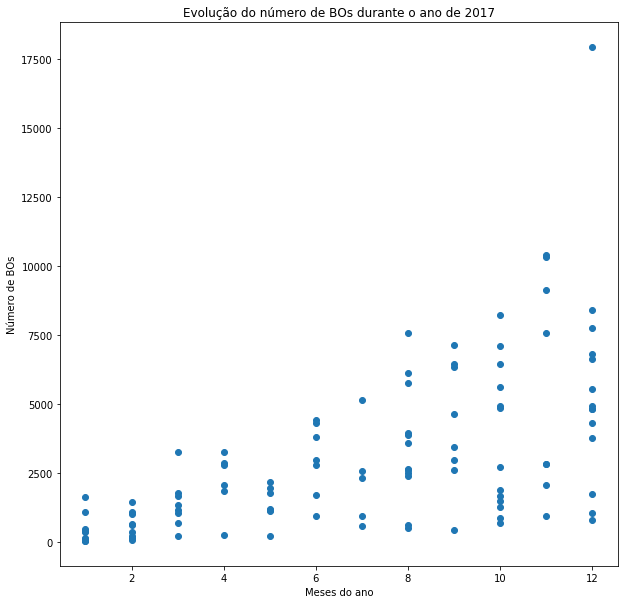

In [362]:
plt.figure(figsize=(10,10))
plt.scatter(data_17['MESANO'], data_17['NUM_BO'])
plt.xlabel('Meses do ano')
plt.ylabel('Número de BOs')
plt.title('Evolução do número de BOs durante o ano de 2017');

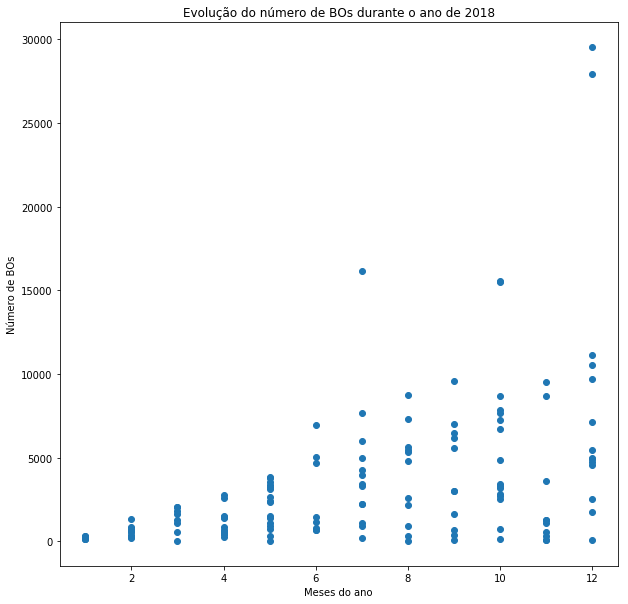

In [363]:
plt.figure(figsize=(10,10))
plt.scatter(data_18['MESANO'], data_18['NUM_BO'])
plt.xlabel('Meses do ano')
plt.ylabel('Número de BOs')
plt.title('Evolução do número de BOs durante o ano de 2018');

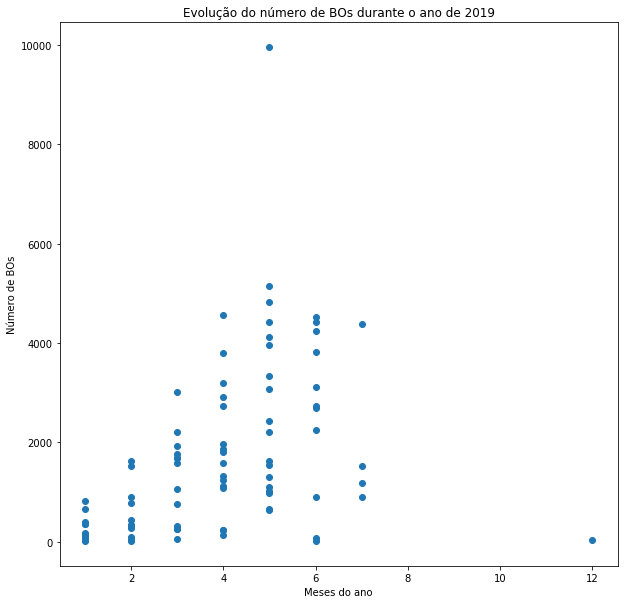

In [364]:
plt.figure(figsize=(10,10))
plt.scatter(data_19['MESANO'], data_19['NUM_BO'])
plt.xlabel('Meses do ano')
plt.ylabel('Número de BOs')
plt.title('Evolução do número de BOs durante o ano de 2019');

In [365]:
data.head()

,ANO_BO,ANO_FABRICACAO,ANO_MODELO,BAIRRO,BO_AUTORIA,BO_EMITIDO,BO_INICIADO,CIDADE,CORCUTIS,DATACOMUNICACAO,...,RUBRICA,SEXO,SOLUCAO,STATUS,TIPOPESSOA,TIPOVINCULO,UF,VITIMAFATAL,DIASEMANA,MESANO
0,2016.0,0.0,0.0,JD MARILU,Conhecida,19/01/2016 16:41:39,19/01/2016 10:39:24,BAURU,Parda,19/01/2016,...,Violência Doméstica,Feminino,BO PARA FLAGRANTE,Consumado,Vítima,Vítima,SP,Sim,Terca,1
0,2016.0,0.0,0.0,GRAJAU,Desconhecida,01/02/2016 06:00:47,01/02/2016 02:48:31,S.PAULO,Parda,01/02/2016,...,"Homicídio qualificado (art. 121, §2o.)",Feminino,BO PARA INQUÉRITO,Consumado,Vítima,Vítima,SP,Sim,Domingo,1
1,2016.0,0.0,0.0,VILA MEDEIROS,Conhecida,07/02/2016 12:35:42,07/02/2016 08:21:21,S.PAULO,Branca,07/02/2016,...,Violência Doméstica,Feminino,BO PARA FLAGRANTE,Consumado,Vítima,Vítima,SP,Sim,Domingo,2
3,2016.0,0.0,0.0,JARDIM CAPIVARI,Desconhecida,12/02/2016 13:35:50,12/02/2016 13:18:48,CAMPINAS,Parda,12/02/2016,...,"Homicídio qualificado (art. 121, §2o.)",Feminino,ENCAMINHAMENTO DP ÁREA DO FATO,Consumado,Vítima,Vítima,SP,Sim,Sexta,2
4,2016.0,0.0,0.0,VILA SANTA RITA,Conhecida,15/02/2016 04:41:14,15/02/2016 02:34:24,CONCHAS,Parda,15/02/2016,...,Violência Doméstica,Feminino,BO PARA INQUÉRITO,Consumado,Vítima,Vítima,SP,Sim,Segunda,2


In [367]:
data.columns

Index(['ANO_BO', 'ANO_FABRICACAO', 'ANO_MODELO', 'BAIRRO', 'BO_AUTORIA',
       'BO_EMITIDO', 'BO_INICIADO', 'CIDADE', 'CORCUTIS', 'DATACOMUNICACAO',
       'DATAELABORACAO', 'DATANASCIMENTO', 'DATAOCORRENCIA',
       'DELEGACIA_CIRCUNSCRICAO', 'DELEGACIA_NOME', 'DESCRICAOLOCAL',
       'DESDOBRAMENTO', 'ESPECIE', 'ESTADOCIVIL', 'EXAME', 'FLAGRANTE',
       'IDADE', 'NACIONALIDADE', 'NATURALIDADE', 'NATUREZAVINCULADA',
       'NOMEPESSOA', 'NUMERO', 'NUMERO_BOLETIM', 'NUM_BO', 'PERIDOOCORRENCIA',
       'PROFISSAO', 'RG', 'RG_UF', 'RUBRICA', 'SEXO', 'SOLUCAO', 'STATUS',
       'TIPOPESSOA', 'TIPOVINCULO', 'UF', 'VITIMAFATAL', 'DIASEMANA',
       'MESANO'],
      dtype='object')

In [368]:
data['QTD_BO'] = data['NUM_BO']

In [369]:
data.drop(['NUM_BO'], axis=1, inplace=True)

In [383]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 15
Data columns (total 43 columns):
ANO_BO                     390 non-null float64
ANO_FABRICACAO             390 non-null float64
ANO_MODELO                 390 non-null float64
BAIRRO                     390 non-null object
BO_AUTORIA                 390 non-null object
BO_EMITIDO                 390 non-null object
BO_INICIADO                390 non-null object
CIDADE                     390 non-null object
CORCUTIS                   390 non-null object
DATACOMUNICACAO            390 non-null object
DATAELABORACAO             390 non-null object
DATANASCIMENTO             390 non-null object
DATAOCORRENCIA             390 non-null datetime64[ns]
DELEGACIA_CIRCUNSCRICAO    390 non-null object
DELEGACIA_NOME             390 non-null object
DESCRICAOLOCAL             390 non-null object
DESDOBRAMENTO              390 non-null object
ESPECIE                    390 non-null object
ESTADOCIVIL                390 non-null

In [390]:
X1 = data['ANO_BO']
X2 = data['IDADE']
X3 = data['MESANO']
X = pd.concat([X1, X2, X3], axis=1)
y = data.iloc[:, -1]

In [391]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [392]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [397]:
X_test.shape

(78, 3)

In [393]:
model = DecisionTreeRegressor()

In [394]:
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [395]:
y_pred = model.predict(X_test)

In [398]:
new_data = [[2019, 25, 8], [2019, 30, 9], [2019, 35, 10], [2019, 28, 11], [2019, 33, 12]]
new_data = pd.DataFrame(new_data, columns=['ANO_BO', 'IDADE', 'MESANO'])

In [399]:
y_pred_ = model.predict(new_data)

In [400]:
y_pred_

array([9606.,  675., 4382.,   31.,   31.])

Text(0, 0.5, 'Número de BOs')

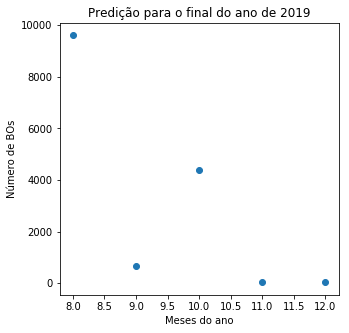

In [404]:
plt.figure(figsize=(5,5))
plt.scatter(new_data['MESANO'], y_pred_)
plt.title('Predição para o final do ano de 2019')
plt.xlabel('Meses do ano')
plt.ylabel('Número de BOs')